# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint
import os
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
citydata = []
lt = []
lng = []
cloudy = []
country = []
date = []
humidity = []
maxtmp = []
windsp = []
citynames = []
# Use test_city variable to code before passing in city list
# test_city = ["Boston","Atlanta"]
key = "&appid=" + weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?q="
#test if url is calling correctly
# weather_data = requests.get(url + str(test_city[x]) + key)
# json_data = weather_data.json()
# pprint(json_data)


print(f"Beginning Data Retrieval")
print(f"-----------------------------")

for x in range (len(cities)):
    weather_data = requests.get(url + str(cities[x]) + key)
    citydata.append(weather_data.json())
    
    print(f"Processing record {x} of Set {x} | {cities[x]}")
    
    try:
        lt.append(citydata[x]['coord']['lat'])
        lng.append(citydata[x]['coord']['lon'])
        cloudy.append(citydata[x]['clouds']['all'])
        country.append(citydata[x]['sys']['country'])
        date.append(citydata[x]['dt'])
        humidity.append(citydata[x]['main']['humidity'])
        maxtmp.append(citydata[x]['main']['temp_max'])
        windsp.append(citydata[x]['wind']['speed'])
        citynames.append(citydata[x]['name'])
    except:
        print (f"Error: City of {cities[x]} not found")

Beginning Data Retrieval
-----------------------------
Processing record 0 of Set 0 | cape town
Processing record 1 of Set 1 | yulara
Processing record 2 of Set 2 | mumford
Processing record 3 of Set 3 | ruatoria
Error: City of 3 not found
Processing record 4 of Set 4 | taolanaro
Error: City of 4 not found
Processing record 5 of Set 5 | kutum
Processing record 6 of Set 6 | tumannyy
Error: City of 6 not found
Processing record 7 of Set 7 | khatanga
Processing record 8 of Set 8 | tukan
Processing record 9 of Set 9 | geraldton
Processing record 10 of Set 10 | pringsewu
Processing record 11 of Set 11 | cherskiy
Processing record 12 of Set 12 | hithadhoo
Processing record 13 of Set 13 | alzamay
Processing record 14 of Set 14 | illoqqortoormiut
Error: City of 14 not found
Processing record 15 of Set 15 | saldanha
Processing record 16 of Set 16 | sao filipe
Processing record 17 of Set 17 | saint-philippe
Processing record 18 of Set 18 | alexandria
Processing record 19 of Set 19 | taoudenni
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({"City":citynames,
                          "Cloudiness":cloudy,
                          "Country":country,
                          "Date":date,
                          "Humidity":humidity,
                          "Lat":lt,
                          "Lng":lng,
                          "Max Temp":maxtmp,
                          "Wind Speed":windsp,
                          })

In [78]:
# weather_df.head()
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

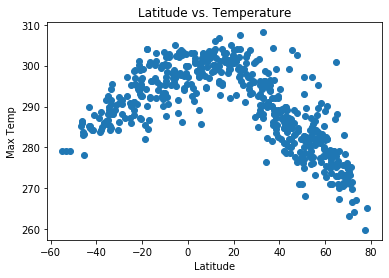

In [12]:
x = weather_df["Lat"]
y = weather_df["Max Temp"]
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Temperature');
plt.savefig('latvtmp.png')

This graph plots latitude vs. temperature. The graph shows a decline in temparature as latitude increases.
The highest latitude, 80, is close to the north pole. It makes sense that the temperature would decrease closer to the north pole.

#### Latitude vs. Humidity Plot

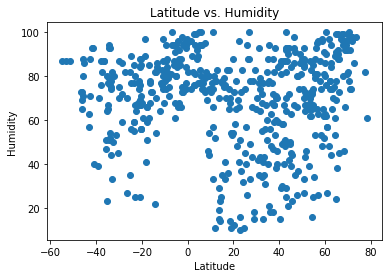

In [13]:
x2 = weather_df["Lat"]
y2 = weather_df["Humidity"]
plt.scatter(x2,y2)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
plt.savefig('latvhum.png');

The graph plots latitude vs. humidity. There doesn't appear to be a clear relationship between latitude and humidity.

#### Latitude vs. Cloudiness Plot

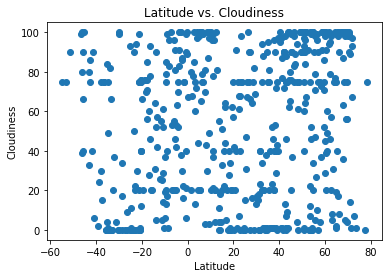

In [14]:
x3 = weather_df["Lat"]
y3 = weather_df["Cloudiness"]
plt.scatter(x3,y3)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.savefig('latvcloud.png');

This graph plots latitue vs. cloudiness. There doesn't appear to be a relationship between latitude and cloudiness.

#### Latitude vs. Wind Speed Plot

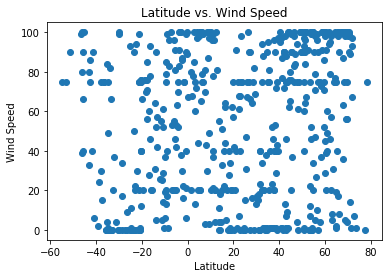

In [15]:
x4 = weather_df["Lat"]
y4 = weather_df["Wind Speed"]
plt.scatter(x3,y3)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.savefig('latvwind.png');

This graph plots latitude vs. wind speed. There doesn't appear to be a relationship between latitude and windspeed.
It seems as though each wind speed is registered at any given latitude.

## Linear Regression

In [31]:
# OPTIONAL: Create a function to create Linear Regression plots



In [79]:
# Create Northern and Southern Hemisphere DataFrames
df_north= weather_df.loc[weather_df['Lat']>0]
df_south= weather_df.loc[weather_df['Lat']<0]

#test df_north
# df_north

#test df_south
# df_south

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8505784952316637


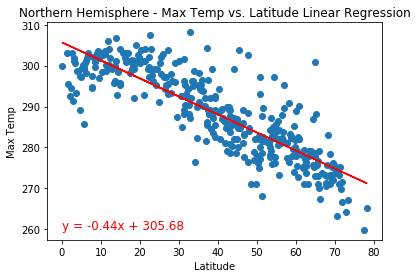

In [38]:
x = df_north["Lat"]
y = df_north["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
y_regress = slope * x + intercept
equation = "y = " + str(round(slope,2)) + "x" + " + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,y_regress, "r-")
plt.annotate(equation,(0,260), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print (f"The r-squared is: {rvalue}")


plt.savefig('NorthernLatTempRegression.png')

This graph shows a linear regression over the relationship of max temperature vs. latitude in the northern hemisphere.
There appears to be an inverse correlation between max temperature and latitude in the northern hemisphere.
As latitude increases, max temperature decreases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7567674513605583


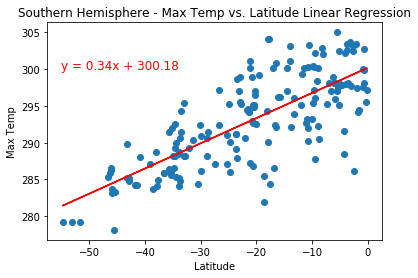

In [46]:
xs = df_south["Lat"]
ys = df_south["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xs,ys)
y_regresss = slope * xs + intercept
equations = "y = " + str(round(slope,2)) + "x" + " + " + str(round(intercept,2))

plt.scatter(xs,ys)
plt.plot(xs,y_regresss, "r-")
plt.annotate(equations,(-55,300), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print (f"The r-squared is: {rvalue}")


plt.savefig('SouthernLatTempRegression.png')

This graph shows a linear regression over the relationship of max temperature vs. latitude in the southern hemishphere.
There appears to be a positive correlation between temperature and latitude in the southern hemisphere.
As latitude increases (gets closer to 0), temperature also increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1602486834278914


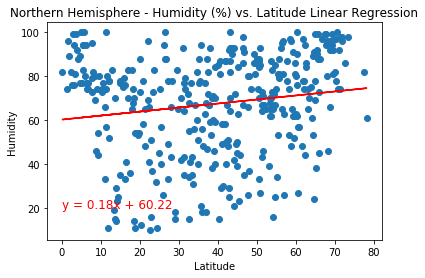

In [52]:
x2 = df_north["Lat"]
y2 = df_north["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x2,y2)
y_regress2 = slope * x2 + intercept
equation = "y = " + str(round(slope,2)) + "x" + " + " + str(round(intercept,2))

plt.scatter(x2,y2)
plt.plot(x2,y_regress2, "r-")
plt.annotate(equation,(0,20), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print (f"The r-squared is: {rvalue}")


plt.savefig('NorthernLatHumidityRegression.png')

This graph shows a linear regression over the relationship of humidity vs. latitude in the nothern hemisphere.
There appears to be a slight positive correlation between latitude and humidity in the northern hemisphere.
As latitude in the north hemisphere increases, humidity increases slightly.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2652917993675121


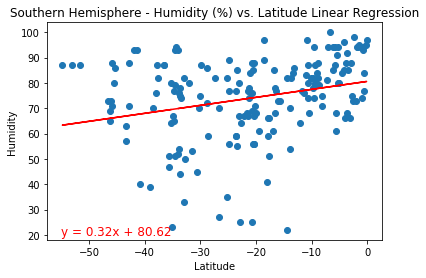

In [55]:
x2s = df_south["Lat"]
y2s = df_south["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x2s,y2s)
y_regress2s = slope * x2s + intercept
equations = "y = " + str(round(slope,2)) + "x" + " + " + str(round(intercept,2))

plt.scatter(x2s,y2s)
plt.plot(x2s,y_regress2s, "r-")
plt.annotate(equations,(-55,20), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print (f"The r-squared is: {rvalue}")


plt.savefig('SouthernLatHumidityRegression.png')

This graph shows a linear regression over the relationship between humidity and latitude in the southern hemisphere.
There appears to be a slight correlation between humidity and latitude in the southern hemisphere.
As latitude increases (gets closer to 0), humidity slightly increases.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.8505784952316637


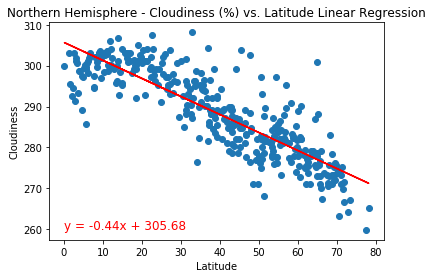

In [58]:
x3 = df_north["Lat"]
y3 = df_north["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x3,y3)
y_regress3 = slope * x3 + intercept
equation = "y = " + str(round(slope,2)) + "x" + " + " + str(round(intercept,2))

plt.scatter(x3,y3)
plt.plot(x3,y_regress3, "r-")
plt.annotate(equation,(0,260), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print (f"The r-squared is: {rvalue}")


plt.savefig('NorthernLatCloudinessRegression.png')

This graph shows a linear regression over the relationship of cloudiness vs. latitude in the northern hemisphere.
There appears to be an inverse correlation between cloudiness and latitude in the northern hemisphere.
As latitude increases, cloudiness decreases.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.7567674513605583


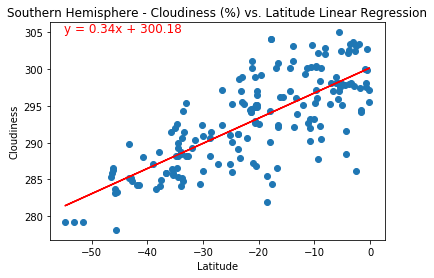

In [61]:
x3s = df_south["Lat"]
y3s = df_south["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x3s,y3s)
y_regress3s = slope * x3s + intercept
equations = "y = " + str(round(slope,2)) + "x" + " + " + str(round(intercept,2))

plt.scatter(x3s,y3s)
plt.plot(x3s,y_regress3s, "r-")
plt.annotate(equations,(-55,305), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print (f"The r-squared is: {rvalue}")


plt.savefig('SouthernLatCloudinessRegression.png')

This graph shows a linear regression over the relationship between cloudiness and latitude in the southern hemisphere.
There appears to be a positive correlation between latitude and cloudiness in the southern hemisphere.
As latitude increases (gets closer to 0), cloudiness increases.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.8505784952316637


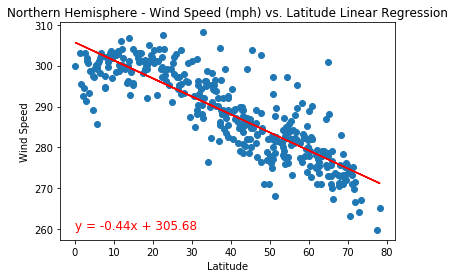

In [64]:
x4 = df_north["Lat"]
y4 = df_north["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x4,y4)
y_regress4 = slope * x4 + intercept
equation = "y = " + str(round(slope,2)) + "x" + " + " + str(round(intercept,2))

plt.scatter(x4,y4)
plt.plot(x4,y_regress4, "r-")
plt.annotate(equation,(0,260), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print (f"The r-squared is: {rvalue}")


plt.savefig('NorthernLatWindRegression.png')

This graph shows a linear regression over the relationship between wind speed and latitude in the northern hemisphere.
There is an inverse correlation between latitude and wind speed.
As latitude increases, wind speed decreases.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.7567674513605583


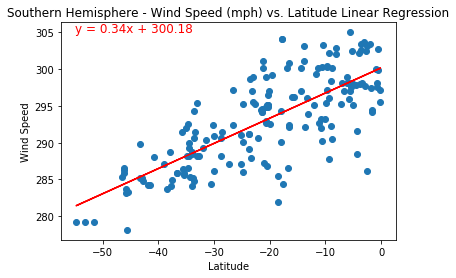

In [77]:
x4s = df_south["Lat"]
y4s = df_south["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x4s,y4s)
y_regress4s = slope * x4s + intercept
equations = "y = " + str(round(slope,2)) + "x" + " + " + str(round(intercept,2))

plt.scatter(x4s,y4s)
plt.plot(x4s,y_regress4s, "r-")
plt.annotate(equations,(-55,305), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print (f"The r-squared is: {rvalue}")


plt.savefig('SouthernLatWindRegression.png')

This graph shows a linear regression over the relationship between wind speed and latitude in the southern hemisphere.
There is a positive correlation between wind speed and latitude in the southern hemisphere.
As latitude increases (gets closer to 0), wind speed also increases.